## Визуализация данных



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Визуализация данных при помощи пакета `matplotlib`

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
data = np.load('average_ratings.npy')

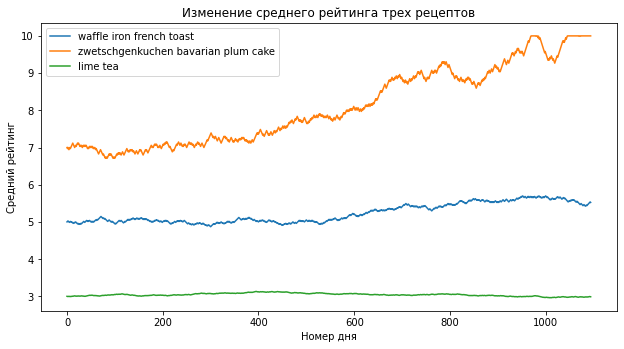

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

line1 = ax.plot(np.arange(0, len(data[0])), data[0], label='waffle iron french toast')
line2 = ax.plot(np.arange(0, len(data[1])), data[1], label='zwetschgenkuchen bavarian plum cake')
line3 = ax.plot(np.arange(0, len(data[2])), data[2], label='lime tea')

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.legend(handles=[line1, line2, line3], loc='upper left')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [ ]:
date = pd.date_range(start='2019-01-01', end='2021-12-30')
date

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

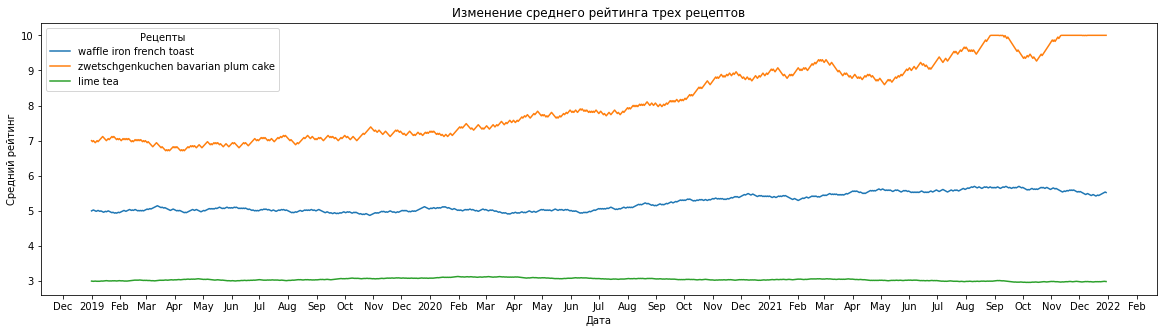

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(date, data[0], date, data[1], date, data[2])
ax = fig.get_axes()[0]
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.legend(handles=[line1, line2, line3], loc='upper left', title = 'Рецепты', fontsize=10)
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

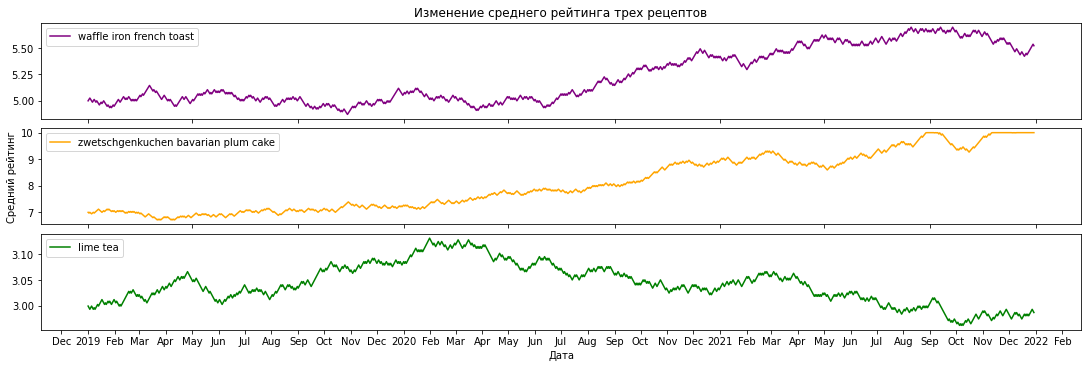

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5), layout='constrained')
labels=["waffle iron french toast", "zwetschgenkuchen bavarian plum cake", "lime tea"]
colors = ['purple', 'orange', 'green']

for i, axi in enumerate(axes):
    axi.plot(date, data[i], color=colors[i])
    axi.xaxis.set_major_formatter('')
    axi.legend(labels=[labels[i]], loc='upper left', fontsize=10)


ax = fig.get_axes()[2]
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.set_xlabel('Дата')
fig.get_axes()[1].set_ylabel('Средний рейтинг')
fig.get_axes()[0].set_title('Изменение среднего рейтинга трех рецептов')
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [ ]:
data_1 = np.load('visitors.npy')

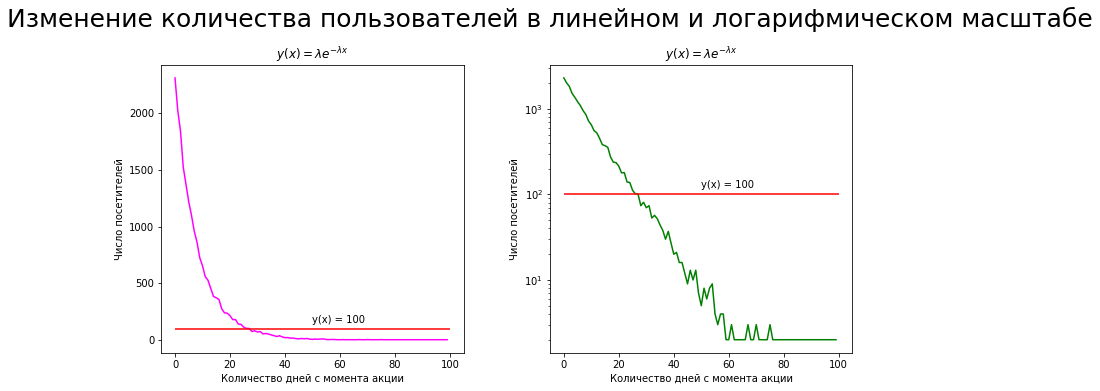

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.7, 1])
line1, = ax1.plot(np.arange(0, len(data_1)), data_1, color='magenta')
ax1.set_ylabel('Число посетителей')
ax1.set_xlabel('Количество дней с момента акции')

ax2 = fig.add_axes([1.0, 0.1, 0.7, 1])
line2, = ax2.plot(np.arange(0, len(data_1)), data_1,color = 'green', label = '$y(x)=\lambda e^{-\lambda x}$')
ax2.set_yscale('log')

ax1.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax2.set_title('$y(x)=\lambda e^{-\lambda x}$')

ax1.hlines(100, 0, len(data_1), color = 'red')
ax1.text(50, 150, 'y(x) = 100')
ax2.hlines(100, 0, len(data_1), color = 'red')
ax2.text(50, 120, 'y(x) = 100')

ax2.set_ylabel('Число посетителей')
ax2.set_xlabel('Количество дней с момента акции')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', x = 1, y = 1.3, fontsize = 25)

plt.show()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews

In [ ]:
reviews = pd.read_csv("reviews_sample.csv", delimiter=",",index_col="Unnamed: 0")
reviews

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [ ]:
recipes = pd.read_csv("recipes_sample.csv", delimiter=",")
recipes = recipes.set_index('id')
recipes

,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id,,,,,,,
44123,george s at the cove black bean soup,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
35173,italian gut busters,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
84797,love is in the air beef fondue sauces,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...
267661,zurie s holey rustic olive and cheddar bread,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
386977,zwetschgenkuchen bavarian plum cake,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
103312,zwiebelkuchen southwest german onion cake,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
short = recipes[recipes.minutes < 5]
short_mean_steps = short['n_steps'].mean()
short_size = len(short)
print(f'Среднее количество шагов: {short_mean_steps}\nPазмер группы: {short_size}')


Среднее количество шагов: 4.990430622009569
Pазмер группы: 675


In [ ]:
medium = recipes[(recipes.minutes >= 5) & (recipes.minutes < 50)]
medium_mean_steps = medium['n_steps'].mean()
medium_size = len(medium)
print(f'Среднее количество шагов: {medium_mean_steps}\nPазмер группы: {medium_size}')

Среднее количество шагов: 8.581921927361652
Pазмер группы: 17607


In [ ]:
long = recipes[recipes.minutes >= 50]
long_mean_steps = long['n_steps'].mean()
long_size = len(long)
print(f'Среднее количество шагов: {long_mean_steps}\nPазмер группы: {long_size}')

Среднее количество шагов: 11.917290164603456
Pазмер группы: 11718


In [ ]:
%matplotlib inline
data1 = {'Short': short_mean_steps, 'Medium': medium_mean_steps, 'Long': long_mean_steps}
data2 = {'Short': short_size, 'Medium': medium_size, 'Long': long_size}
group = list(data1.keys())
values1 = list(data1.values())
values2 = list(data2.values())

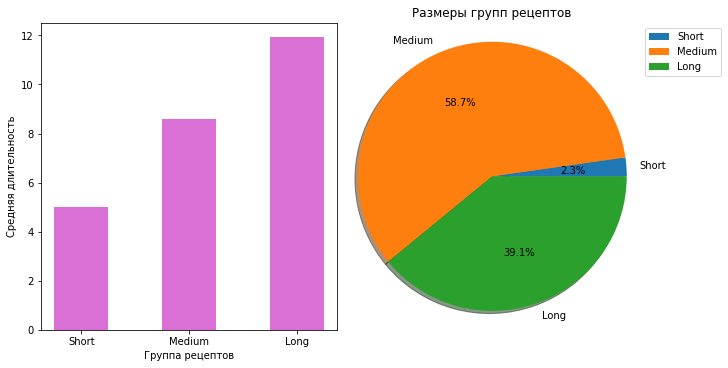

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), layout="constrained")
ax1.bar(group, values1, width = 0.5, color='orchid')
ax1.set_xlabel("Группа рецептов")
ax1.set_ylabel("Средняя длительность")
ax2.pie(values2,labels=group,shadow=True,autopct='%.1f%%')
ax2.axis('equal')
ax2.set_title('Размеры групп рецептов')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [ ]:
rev = reviews.loc[('2008-01-01'<=reviews['date']) & (reviews['date']<='2009-12-31')]
rev

,user_id,recipe_id,date,rating,review
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...
264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days..."
126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...
...,...,...,...,...,...
532061,335737,36548,2008-04-22,5,If only there were more stars to give! Normall...
698638,1186693,394518,2009-12-09,0,I must have done something wrong! Mine were v...
344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau..."
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...


In [ ]:
rev.loc[('2008-01-01'<=reviews['date']) & (reviews['date']<='2009-12-31')]['rating'].mean()

4.504161384556027

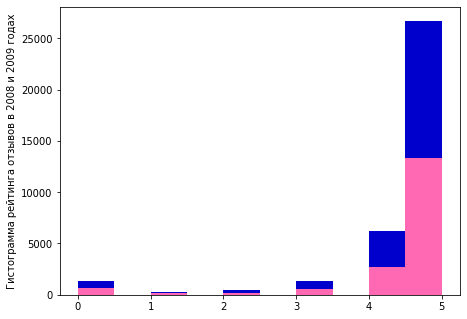

In [ ]:
fig = plt.figure(figsize = (12,8))

ax0 = fig.add_subplot(1, 3, 1)
rev.loc[('2008-01-01'<=reviews['date']) & (reviews['date']<='2009-12-31')]['rating'].plot.hist(ax = ax0, color = 'mediumblue')
rev.loc[('2009-01-01'<=reviews['date']) & (reviews['date']<='2009-12-31')]['rating'].plot.hist(ax = ax0, color = 'hotpink')
ax0.set_ylabel('Гистограмма рейтинга отзывов в 2008 и 2009 годах')
plt.subplots_adjust(bottom = 0.5, right = 1.7, top = 1)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [ ]:
group=[]
for min in recipes['minutes']:
    if min<5:
        group.append('short')
    if 5<=min<50:
        group.append('medium')
    if min>=50:
        group.append('long')
recipes['group']=group

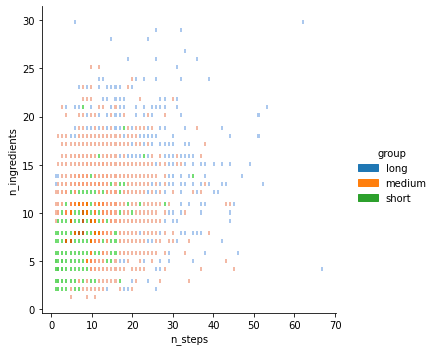

In [ ]:
sns.displot(recipes,x='n_steps',y='n_ingredients',hue='group')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [ ]:
df=pd.merge(recipes[['minutes','n_steps','n_ingredients']],reviews[['recipe_id','rating']],left_on='id',right_on='recipe_id')
df=df.drop(labels='recipe_id',axis=1)
df.index.name='index'
df

,minutes,n_steps,n_ingredients,rating
index,,,,
0,90,NaN,18.0,5
1,90,NaN,18.0,5
2,90,NaN,18.0,5
3,10,NaN,NaN,5
4,10,NaN,NaN,5
...,...,...,...,...
126691,60,NaN,NaN,5
126692,60,NaN,NaN,5
126693,60,NaN,NaN,5


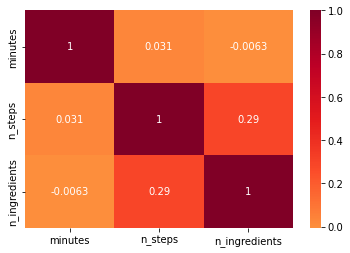

In [ ]:
dataplot=sns.heatmap(df[['minutes','n_steps','n_ingredients']].corr(),cmap='YlOrRd',center=0.0,annot=True)